# Regression

#### Machine Learning with Python - Notebook #1

Description:
- Linear Regression
- Multiple Linear Regression
- Polynomial Regression
- Non-Linear Regresion




**Import Libraries**

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

**Download Data**

In [4]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
ds = pd.read_csv(path)

**Data Explorations**

In [5]:
ds.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


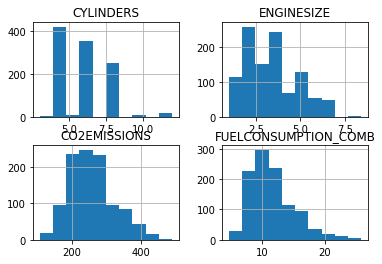

In [6]:
viz = ds[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist() #create value count historgram for every column specified
plt.show()

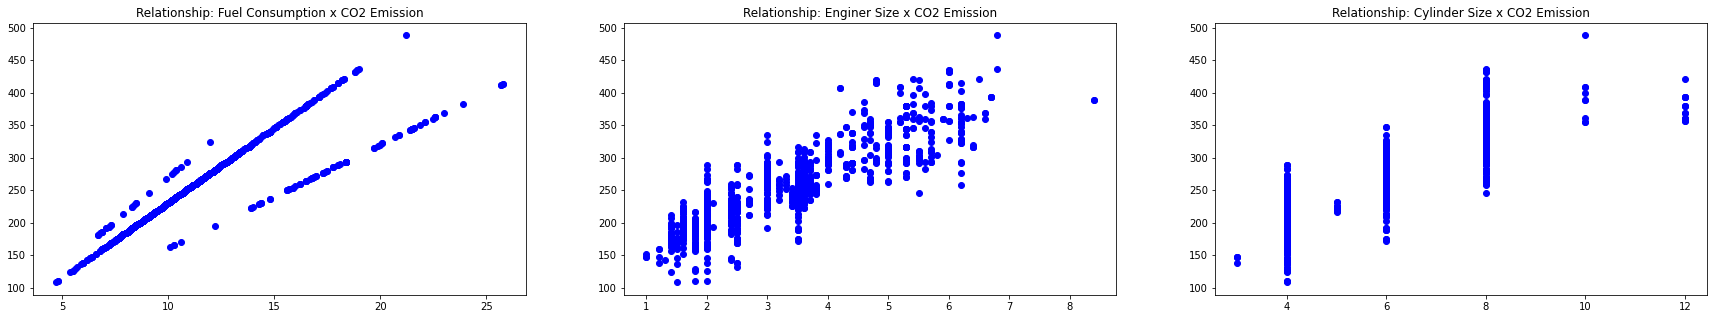

In [7]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 5))
axs[0].scatter(ds.FUELCONSUMPTION_COMB, ds.CO2EMISSIONS,  color = 'blue')
axs[1].scatter(ds.ENGINESIZE, ds.CO2EMISSIONS,  color = 'blue')
axs[2].scatter(ds.CYLINDERS, ds.CO2EMISSIONS,  color = 'blue')
axs[0].title.set_text("Relationship: Fuel Consumption x CO2 Emission")
axs[1].title.set_text("Relationship: Enginer Size x CO2 Emission")
axs[2].title.set_text("Relationship: Cylinder Size x CO2 Emission")
plt.show()

**Split Data**: Train 80%, Test 20%

In [8]:
from sklearn.model_selection import train_test_split

X, y = ds[['FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']], ds['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

**Linear Regression Model**: Get the line's parameters (slope coefficients, intercept)

Slope Coefficient:  [38.99297872] 	Intercept 126.28970217408721


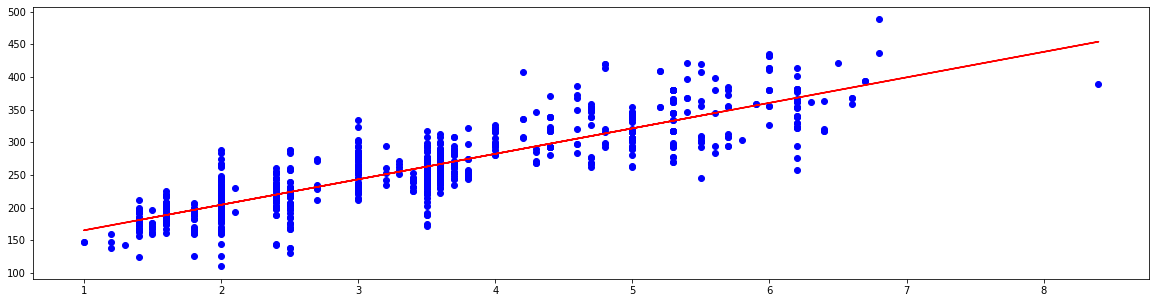

In [9]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train[['ENGINESIZE']], y_train) #only using one column, for the sake of visualization
print("Slope Coefficient: ", model.coef_ ,"\tIntercept", model.intercept_)

plt.figure(figsize = (20, 5))
plt.scatter(X_train['ENGINESIZE'], y_train, color = 'blue')
plt.plot(X_train[['ENGINESIZE']], model.coef_[0]*X_train[['ENGINESIZE']] + model.intercept_, '-r')
plt.show()

**Model Evaluation**: use R2-Score to determine how successful the model is at predicting future values

In [10]:
from sklearn.metrics import r2_score

predictions = model.predict(X_test[['ENGINESIZE']])
print("Mean absolute error: ", round(np.mean(np.absolute(predictions - [y_test])), 2))
print("Residual sum of squares (MSE): ", round(np.mean((predictions - [y_test]) ** 2), 2))
print("R2-score: %.2f" % r2_score(y_test , predictions))

Mean absolute error:  24.1
Residual sum of squares (MSE):  985.94
R2-score: 0.76


*REMARKS*:

- **Mean Absolute Error (MAE)** = The mean of the absolute value of errors. Easiest of metrics to understand. It's just the ***AVERAGE OF ERRORS***
- **Mean Squared Error (MSE)** =  The mean of the squared error. It's more popular the MAE because the focus is geared more towards large erroros due to the squared term exponentially increasing large errors in comparison to smaller ones.
- **$R^2$ Score** = Not an error, but rather a popular metric to measyre the performance of the model (specifically, regression). It represnts how close the data points are to the fitten regression line. The higher the R-squared value, the better the model fits the data. Best possible score is 1.0, and it can also be negative. 

**Multiple Linear Regression** = Linear Regression with multiple columns (fields, parameters) as training independent values.

In [11]:
from sklearn import linear_model

#train
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print("Slope Coefficients: ", model.coef_ ,"\tIntercept", model.intercept_)

#predict
predictions = model.predict(X_test)

#evaluate
print("R2-score: %.2f" % r2_score(y_test , predictions))
print("Explained Variance Score", round(model.score(X , y), 2))


Slope Coefficients:  [ 9.5208118  11.2094395   7.15561381] 	Intercept 67.34838518362096
R2-score: 0.88
Explained Variance Score 0.86


*REMARK*:

- **Explained Variance Score (EVS)** = 1 is a prefect score
$$ EVS(y, \hat{y}) = 1 - \frac{Variance_y - \hat{y}}{Variance_y}$$

**Polynomial Regression**


In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train)
print("Slope Coefficients: ", model.coef_ ,"\tIntercept", model.intercept_)

predictions = model.predict(X_test_poly)
print("Mean absolute error: ", round(np.mean(np.absolute(predictions - [y_test])), 2))
print("Residual sum of squares (MSE): ", round(np.mean((predictions - [y_test]) ** 2), 2))
print("R2-score: %.2f" % r2_score(y_test , predictions))

Slope Coefficients:  [  0.          31.79788221  -0.08302981 -10.95302447  -1.70440998
   3.7284399    1.74898048   2.96209678  -9.5526584    2.26618871] 	Intercept 1.0763142013901756
Mean absolute error:  10.56
Residual sum of squares (MSE):  341.4
R2-score: 0.92


*REMARK*:

- **Transformation to Polynomial Featurea** = We transform the linear input fields to polynomial by performing *fit_transforms* which takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.

$$
\begin{bmatrix}
v\_1\\\\
v\_2\\
\vdots\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
[ 1 & v\_1 & v\_1^2]\\
[ 1 & v\_2 & v\_2^2]\\
\vdots & \vdots & \vdots\\
[ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\
2.4\\
1.5\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
[ 1 & 2. & 4.]\\
[ 1 & 2.4 & 5.76]\\
[ 1 & 1.5 & 2.25]\\
\vdots & \vdots & \vdots\\
\end{bmatrix}
$$


**Non-Linear Regression** is a method to model the non-linear relationship between the independetn variable $x$ and the dependent variable $y$. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$).  

For example, of degree $= 3$:

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and so on. For example: $$ y = \log(x)$$

We can have a function that's even more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

Some other types of non-lineat functions include:

- Quadratic $y = X^2$
- Exponential $y = a + bc^X$
- Logarithmic $y = log(X)$
- Sigmoidal $y = a + \frac{b}{1 + c^{(X - d)}}$